# Nutritional Facts about Starbucks Drinks

The data explored in this notebook was obtained from the "Nutrition facts for Starbucks Menu" Kaggle site.
The data contains information about the Starbucks Drinks Menu with ingredients.

## Libraries

In [1]:
#pip install plotly==4.14.3

In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data Preparation

In [3]:
df = pd.read_csv('starbucks_drinkMenu_expanded.csv')

In [4]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [5]:
df.shape

(242, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calories,242.0,193.871901,102.863303,0.0,120.0,185.0,260.00,510.0
Trans Fat (g),242.0,1.307025,1.640259,0.0,0.1,0.5,2.00,9.0
Saturated Fat (g),242.0,0.037603,0.071377,0.0,0.0,0.0,0.10,0.3
Sodium (mg),242.0,6.363636,8.630257,0.0,0.0,5.0,10.00,40.0
Total Carbohydrates (g),242.0,128.884298,82.303223,0.0,70.0,125.0,170.00,340.0
Cholesterol (mg),242.0,35.991736,20.795186,0.0,21.0,34.0,50.75,90.0
Dietary Fibre (g),242.0,0.805785,1.445944,0.0,0.0,0.0,1.00,8.0
Sugars (g),242.0,32.962810,19.730199,0.0,18.0,32.0,43.75,84.0
Protein (g),242.0,6.978512,4.871659,0.0,3.0,6.0,10.00,20.0


In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

## Data Manipulation

In [9]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [10]:
df.columns = df.columns.str.replace(")","")
df.columns = df.columns.str.replace(" ","")
df.columns = df.columns.str.replace("(","_")
df.columns = df.columns.str.lower()
df.columns

Index(['beverage_category', 'beverage', 'beverage_prep', 'calories',
       'totalfat_g', 'transfat_g', 'saturatedfat_g', 'sodium_mg',
       'totalcarbohydrates_g', 'cholesterol_mg', 'dietaryfibre_g', 'sugars_g',
       'protein_g', 'vitamina_%dv', 'vitaminc_%dv', 'calcium_%dv', 'iron_%dv',
       'caffeine_mg'],
      dtype='object')

In [11]:
cols_to_keep=["beverage_category", "beverage","beverage_prep","calories","totalfat_g","totalcarbohydrates_g",
               "protein_g"]
starbucks_data=df[cols_to_keep]
starbucks_data=starbucks_data.rename(columns={"totalfat_g":"fat_g",
                                                "totalcarbohydrates_g":"carbohydrates_g",
                                              "protein_g":"proteins_g",
                                              "beverage":"product_name"
                                               })
starbucks_data.head()

,beverage_category,product_name,beverage_prep,calories,fat_g,carbohydrates_g,proteins_g
0,Coffee,Brewed Coffee,Short,3,0.1,5,0.3
1,Coffee,Brewed Coffee,Tall,4,0.1,10,0.5
2,Coffee,Brewed Coffee,Grande,5,0.1,10,1.0
3,Coffee,Brewed Coffee,Venti,5,0.1,10,1.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,75,6.0


In [12]:
starbucks_data.carbohydrates_g=starbucks_data.carbohydrates_g.astype(float)
starbucks_data.fat_g.unique()


array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [13]:
starbucks_data_mistake = starbucks_data.fat_g.loc[starbucks_data.fat_g=="3 2"]
starbucks_data.fat_g = starbucks_data.fat_g.replace('3 2',np.nan)#before u used (starbucks_data_mistake,np.nan) -> u should use the value to be replaced
starbucks_data.fat_g = starbucks_data.fat_g.astype(float)

In [14]:
starbucks_data.fat_g.unique()

array([ 0.1,  3.5,  2.5,  0.2,  6. ,  4.5,  0.3,  7. ,  5. ,  0.4,  9. ,
        1.5,  4. ,  2. ,  8. ,  3. , 11. ,  0. ,  1. , 10. , 15. , 13. ,
        0.5,  nan])

In [15]:
starbucks_data.dtypes

beverage_category     object
product_name          object
beverage_prep         object
calories               int64
fat_g                float64
carbohydrates_g      float64
proteins_g           float64
dtype: object

In [16]:
#pip install missingno

<AxesSubplot:>

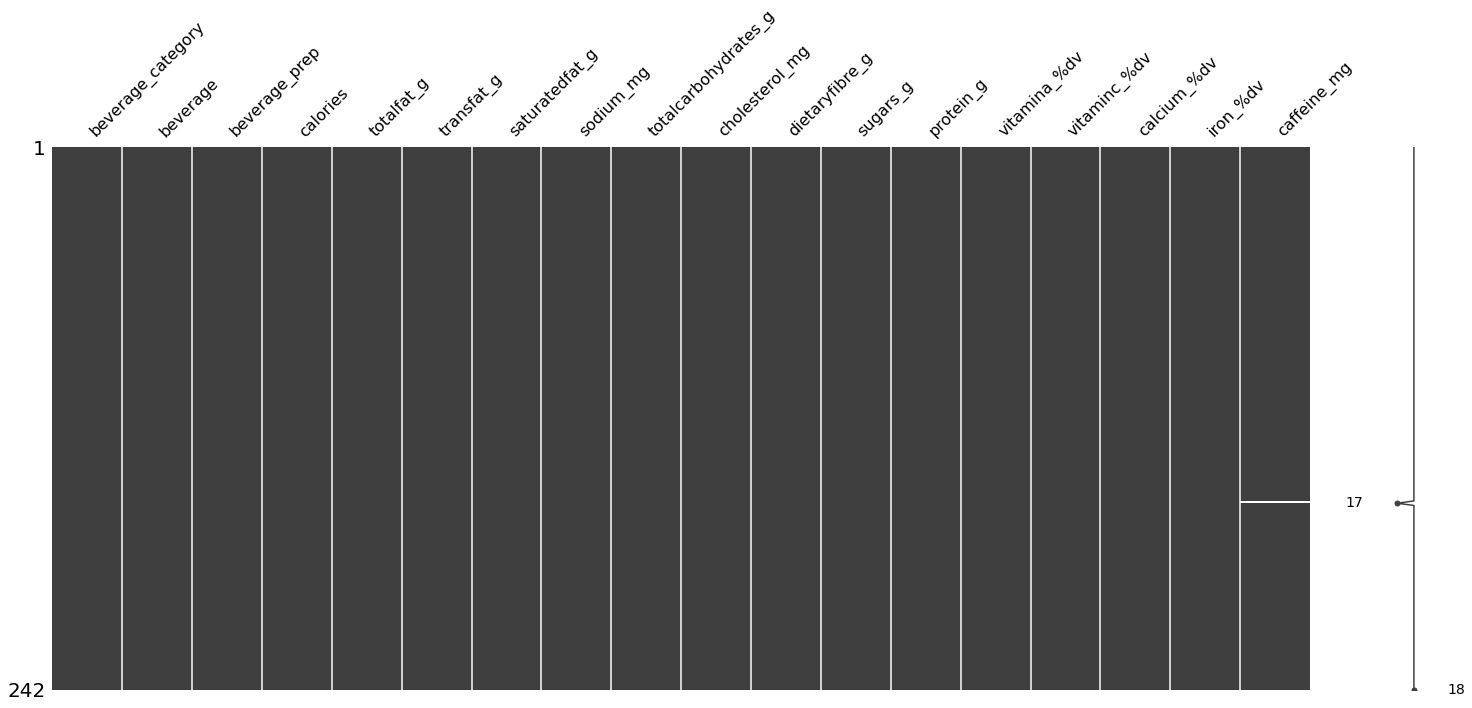

In [17]:
import missingno as msno
msno.matrix(df)

In [18]:
df.isnull().sum()

beverage_category       0
beverage                0
beverage_prep           0
calories                0
totalfat_g              0
transfat_g              0
saturatedfat_g          0
sodium_mg               0
totalcarbohydrates_g    0
cholesterol_mg          0
dietaryfibre_g          0
sugars_g                0
protein_g               0
vitamina_%dv            0
vitaminc_%dv            0
calcium_%dv             0
iron_%dv                0
caffeine_mg             1
dtype: int64

In [19]:
starbucks_data.isnull().sum()

beverage_category    0
product_name         0
beverage_prep        0
calories             0
fat_g                1
carbohydrates_g      0
proteins_g           0
dtype: int64

In [20]:
starbucks_data.fillna(starbucks_data.mean(), inplace=True)

In [21]:
starbucks_data.isnull().sum()

beverage_category    0
product_name         0
beverage_prep        0
calories             0
fat_g                0
carbohydrates_g      0
proteins_g           0
dtype: int64

## Exploratory Data Analysis

#### -- will there will be a relation between calories and beverage preparation type? 

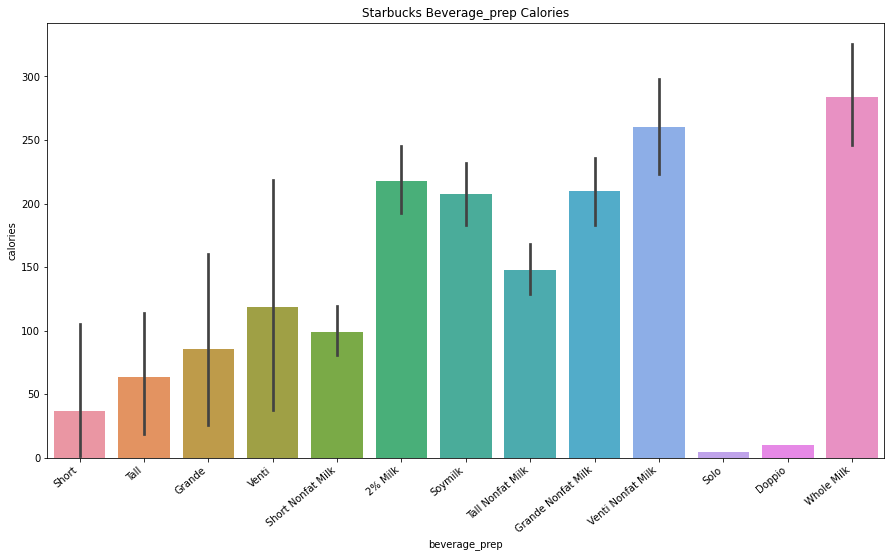

In [22]:
plt.figure(figsize=(15, 8))
sns.barplot(x="beverage_prep", y="calories", data=starbucks_data)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage_prep Calories")
plt.show()

#### -- Is the average amount of the total fat related with the Starbucks drinks category?

In [23]:
by_category = pd.DataFrame({'beverage_category':starbucks_data['beverage_category'].value_counts().index.tolist(),
                            'Count':starbucks_data['beverage_category'].value_counts().tolist(),
                            'fat_g (Sum)':starbucks_data[['beverage_category','fat_g']].groupby('beverage_category').sum()['fat_g'],
                            'fat_g (Mean)':starbucks_data[['beverage_category','fat_g']].groupby('beverage_category').mean()['fat_g']})
by_category.reset_index(drop = True)

,beverage_category,Count,fat_g (Sum),fat_g (Mean)
0,Classic Espresso Drinks,58,181.400000,3.127586
1,Tazo® Tea Drinks,52,0.400000,0.100000
2,Signature Espresso Drinks,40,108.100000,3.002778
3,Frappuccino® Blended Coffee,36,25.103734,1.931056
4,Shaken Iced Beverages,18,15.100000,1.258333
5,Frappuccino® Blended Crème,13,8.500000,0.472222
6,Frappuccino® Light Blended Coffee,12,211.000000,5.275000
7,Smoothies,9,21.000000,2.333333
8,Coffee,4,132.100000,2.540385


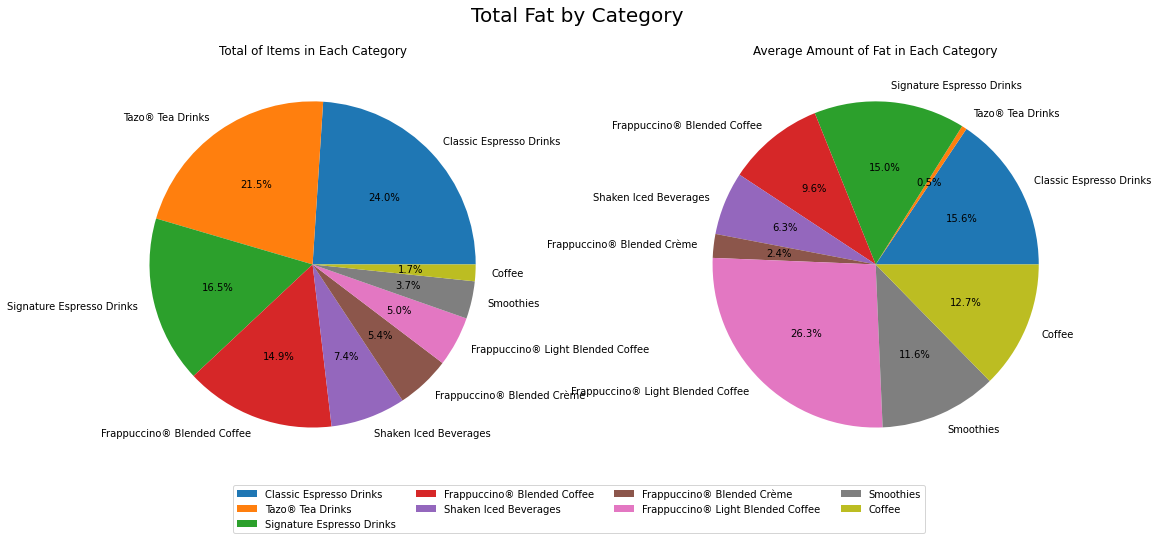

In [24]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18.5, 7.5)
ax1.set_title("Total of Items in Each Category")
ax1.pie(by_category['Count'],labels =by_category['beverage_category'],autopct = '%1.1f%%')

ax2.set_title("Average Amount of Fat in Each Category")
ax2.pie(by_category['fat_g (Mean)'],labels =by_category['beverage_category'],autopct = '%1.1f%%')

fig.suptitle('Total Fat by Category',fontsize = 20)
fig.legend(by_category['beverage_category'],ncol=4,loc=8)


In order to understand the relation between Total Fat and Drink Category we have constructed a pie chart.
From the two charts, there are 9 types of Starbucks Beverages and their average amount of Total Fat in each type.

From the distribution of the average amount of Fat at these types, Frappuccino Light Blended Coffee has the most amount of Fat comparing to others. This type contains approximately 26.4% of TotalFat. On the contrary, the least amount of Fat is in Tazo Tea Drinks. The other beverage groups with a high amount of Fat are Classic Espresso Drinks, Signature Espresso Drinks and Coffee, respectively.

#### --Calories difference between  Classic Espresso Drinks and Signature Espresso Drinks?

Text(0.5, 1.0, 'Classic Espresso Drinks')

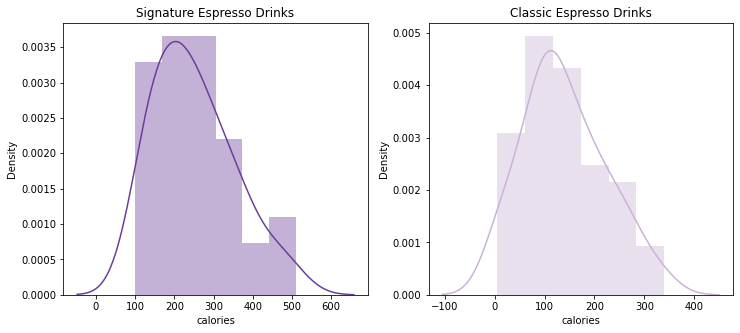

In [25]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(starbucks_data['calories'].loc[starbucks_data['beverage_category'] == 'Signature Espresso Drinks'],
             norm_hist=False, color=sns.color_palette("Paired")[9], ax=ax1)
ax1.set_title('Signature Espresso Drinks')

figure.set_size_inches(12,5)
sns.distplot(starbucks_data['calories'].loc[starbucks_data['beverage_category'] == 'Classic Espresso Drinks'],
             norm_hist=False, color=sns.color_palette("Paired")[8], ax=ax2)
ax2.set_title('Classic Espresso Drinks')

In order to find the difference we constructed a plot which represents the distribution of both drinks.

According to the plot, Classic Espresso Drinks contains more higher amount of calories compared to Signature Espresso Drinks.
Although few Signature Espresso Drinks contains more than 400 amount of calories while no Classic Espresso Drinks includes more than 400 amounts of calories.

Signature Espresso Drinks is better disturbed, that means this type of beverages is more varied in terms of number of calories.

#### -- Which beverage should not be taken under specific circumstances such as higher calories and total fat?

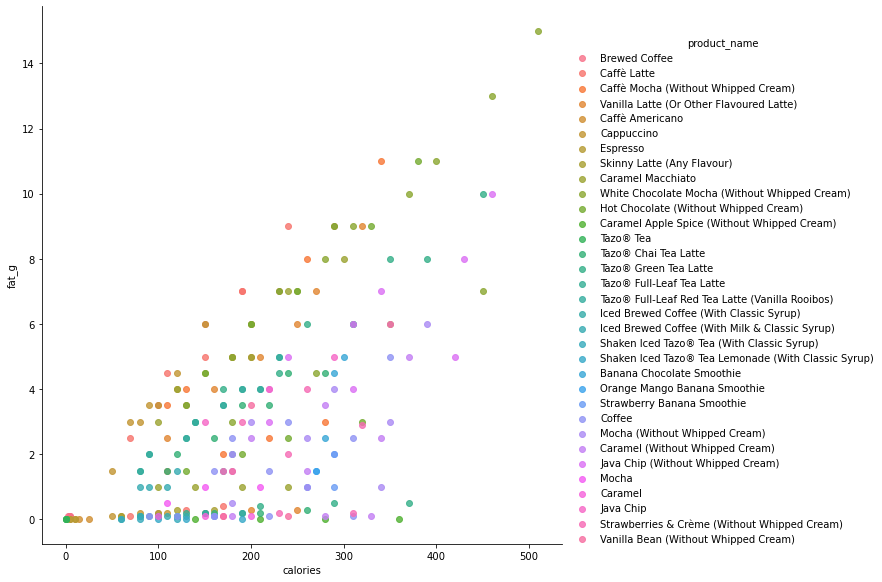

In [26]:
sns.lmplot(data = starbucks_data, x='calories', y='fat_g', fit_reg = False, hue = 'product_name', size = 8, aspect = 1)

This graph represents the distribution of beverages with Calories and Total Fat. 

According to this, White Chocolate Mocha (Without Whipped Cream) and Caramel Macchiato are beverages not to be preferred. They contain a high amount of Calories and Total Fat. Especially, White Chocolate Mocha has more than 500 Calories that a quarter of the average amount of calories a person needs to take in a day.

The most important conclusion of these are; when the size increase, calories level also increases. People should avoid some Starbucks Drinks to be healthy and these are White Chocolate Mocha (Without Whipped Cream) and Caramel Macchiato. The most amount of Calories levels belongs to beverages preparation with Whole Mik.